In [6]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '4bb179eb-725b-4198-8c99-2363d82dc3c7',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-02-06T12:35:43.348Z', 'error_code': 0, 'error_message': None, 'elapsed': 71, 'credit_count': 1, 'notice': None, 'total_count': 8842}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10814, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [7]:
import pandas as pd

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [9]:
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10812,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.961917e+07,1.961917e+07,...,51.1741,8.957666e+11,None,2024-02-05T16:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-05 21:49:30.465807
1,1027,Ethereum,ETH,ethereum,8378,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201832e+08,1.201832e+08,...,16.8784,2.760175e+11,None,2024-02-05T16:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-05 21:49:30.465807
2,825,Tether USDt,USDT,tether,74106,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.623134e+10,9.960077e+10,...,5.8778,9.948704e+10,None,2024-02-05T16:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-05 21:49:30.465807
3,1839,BNB,BNB,bnb,2052,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495463e+08,1.495463e+08,...,2.7504,4.497864e+10,None,2024-02-05T16:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-05 21:49:30.465807
4,5426,Solana,SOL,solana,624,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.362097e+08,5.688802e+08,...,2.5578,5.455040e+10,None,2024-02-05T16:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-05 21:49:30.465807
5,52,XRP,XRP,xrp,1226,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.443619e+10,9.998794e+10,...,1.6752,5.032437e+10,None,2024-02-05T16:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-05 21:49:30.465807
6,3408,USDC,USDC,usd-coin,16584,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.707283e+10,2.707283e+10,...,1.6557,2.707617e+10,None,2024-02-05T16:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-05 21:49:30.465807
7,2010,Cardano,ADA,cardano,1065,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.543269e+10,3.659974e+10,...,1.0725,2.227480e+10,None,2024-02-05T16:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-05 21:49:30.465807
8,5805,Avalanche,AVAX,avalanche,660,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.200000e+08,3.672458e+08,4.352788e+08,...,0.7778,2.493672e+10,None,2024-02-05T16:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-05 21:49:30.465807
9,1975,Chainlink,LINK,chainlink,1615,2017-09-20T00:00:00.000Z,"[platform, defi, oracles, smart-contracts, sub...",1.000000e+09,5.871000e+08,1.000000e+09,...,0.6918,1.926956e+10,None,2024-02-05T16:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2024-02-05 21:49:30.465807


In [11]:
def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    global df
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '4bb179eb-725b-4198-8c99-2363d82dc3c7',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df= pd.json_normalize(data['data'])
    df['timestamp']=pd.to_datetime('now')
    df 
    
    if not os.path.isfile(r'/Users/alfinpatel/Documents/automating/API.csv'):
        df.to_csv(r'/Users/alfinpatel/Documents/automating/API.csv',header='column_names')
    else:
        df.to_csv(r'/Users/alfinpatel/Documents/automating/API.csv', mode='a', header='False')

In [12]:
import os
from requests import Session
from time import time
from time import sleep
from requests.exceptions import Timeout  # Import Timeout exception
import json

for i in range(333):
    api_runner()
    print('API runner completed')
    sleep(60)
exit()

{'status': {'timestamp': '2024-02-06T12:36:32.578Z', 'error_code': 0, 'error_message': None, 'elapsed': 11, 'credit_count': 1, 'notice': None, 'total_count': 8842}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10814, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-02-06T12:37:33.241Z', 'error_code': 0, 'error_message': None, 'elapsed': 78, 'credit_count': 1, 'notice': None, 'total_count': 8842}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10814, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-02-06T12:38:33.661Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 8842}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10814, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [13]:
df2=pd.read_csv(r'/Users/alfinpatel/Documents/automating/API.csv')
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0.0,1,Bitcoin,BTC,bitcoin,10814,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,19619956.0,19619956.0,False,NaN,1,NaN,NaN,NaN,2024-02-06T12:35:00.000Z,42792.66462476184,18444604262.329643,20.8639,0.06207982,-0.72349484,-1.44258826,-2.99224848,-2.02408261,21.09915125,839590197060.5839,51.1781,898645957120.0,NaN,2024-02-06T12:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-06 18:06:32.547546
1,1.0,1027,Ethereum,ETH,ethereum,8380,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120183642.22685288,120183642.22685288,True,NaN,2,NaN,NaN,NaN,2024-02-06T12:35:00.000Z,2325.901354788784,7910976245.141218,18.0887,0.2144829,0.13501571,0.67120575,3.85722698,-1.65793839,23.43376514,279535296278.88763,17.0394,279535296278.89,NaN,2024-02-06T12:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-06 18:06:32.547546
2,2.0,825,Tether USDt,USDT,tether,74184,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,96236495041.17906,99600769237.76942,True,NaN,3,NaN,NaN,NaN,2024-02-06T12:34:00.000Z,0.9989108605761897,30627750378.936672,15.9568,-0.0113927,-0.02281718,-0.09771771,-0.16948931,-0.13169012,-0.14450352,96131680080.4204,5.8598,99492290113.35,NaN,2024-02-06T12:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-06 18:06:32.547546
3,3.0,1839,BNB,BNB,bnb,2053,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149546156.83354783,149546156.83354783,False,NaN,4,NaN,NaN,NaN,2024-02-06T12:34:00.000Z,302.320648639647,711016705.130809,-25.6373,0.21323896,-0.52488482,-2.49300064,-1.34465917,28.64007348,22.68329281,45210891135.48456,2.7559,45210891135.48,NaN,2024-02-06T12:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-06 18:06:32.547546
4,4.0,5426,Solana,SOL,solana,625,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,436207136.8020971,568877625.8772024,True,NaN,5,NaN,NaN,NaN,2024-02-06T12:35:00.000Z,94.00962161817542,1637991389.0221932,10.4093,0.04809109,-3.53528057,-10.03880129,-0.97002902,28.06622274,117.78427562,41007667877.91283,2.4997,53479970355.76,NaN,2024-02-06T12:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-06 18:06:32.547546
5,5.0,52,XRP,XRP,xrp,1226,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.0,54436190886.0,99987935982.0,False,NaN,6,NaN,NaN,NaN,2024-02-06T12:35:00.000Z,0.5008371587781991,802430391.0003988,15.2499,-0.41034763,-0.76607224,-5.77052314,-11.66441857,-23.34839178,-27.74049453,27263667178.051937,1.6619,50083715877.82,NaN,2024-02-06T12:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-06 18:06:32.547546
6,6.0,3408,USDC,USDC,usd-coin,16595,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,27028374829.881546,27028374829.881546,False,NaN,7,NaN,NaN,NaN,2024-02-06T12:35:00.000Z,1.0000255510943394,4345520751.121286,19.7635,-0.00564913,-0.00909317,-0.00478569,0.00644486,-0.01188879,-0.00032645,27029065434.436665,1.6476,27029065434.44,NaN,2024-02-06T12:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-06 18:06:32.547546
7,7.0,2010,Cardano,ADA,cardano,1066,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.0,35432672762.553,36599737145.585,False,NaN,8,NaN,NaN,NaN,2024-02-06T12:3

In [14]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [15]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10814,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19619956.00000,19619956.00000,False,NaN,1,NaN,NaN,None,2024-02-06T12:37:00.000Z,42816.13669,18448615921.85844,20.99170,0.13305,-0.68129,-1.40898,-2.94707,-2.02745,21.15034,840050717947.64343,51.18960,899138870489.84998,None,2024-02-06T12:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-06 18:08:33.554405
1,1027,Ethereum,ETH,ethereum,8380,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120183642.22685,120183642.22685,True,NaN,2,NaN,NaN,None,2024-02-06T12:37:00.000Z,2327.15506,7919058833.17319,18.19970,0.28470,0.18408,0.69959,3.90648,-1.62635,23.48122,279685970867.44568,17.04300,279685970867.45001,None,2024-02-06T12:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-06 18:08:33.554405
2,825,Tether USDt,USDT,tether,74184,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,96236495041.17906,99600769237.76942,True,NaN,3,NaN,NaN,None,2024-02-06T12:36:00.000Z,0.99887,30631203665.56813,15.91820,-0.01387,-0.03016,-0.11098,-0.17587,-0.12893,-0.14640,96127627006.46817,5.85770,99488095350.41000,None,2024-02-06T12:36:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-06 18:08:33.554405
3,1839,BNB,BNB,bnb,2053,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149546156.83355,149546156.83355,False,NaN,4,NaN,NaN,None,2024-02-06T12:36:00.000Z,302.35327,711113262.91571,-25.62690,0.23267,-0.50067,-2.45944,-1.33112,28.65138,22.68629,45215769186.76849,2.75620,45215769186.77000,None,2024-02-06T12:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-06 18:08:33.554405
4,5426,Solana,SOL,solana,625,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,436207136.80210,568877625.87720,True,NaN,5,NaN,NaN,None,2024-02-06T12:37:00.000Z,93.94533,1639003733.33316,10.49540,-0.16085,-3.65441,-10.14028,-1.00071,28.02254,117.78968,40979622756.57352,2.49710,53443395433.67000,None,2024-02-06T12:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-06 18:08:33.554405
5,52,XRP,XRP,xrp,1226,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54436190886.00000,99987935982.00000,False,NaN,6,NaN,NaN,None,2024-02-06T12:37:00.000Z,0.50088,802716932.41438,15.26430,-0.41673,-0.81129,-5.75069,-11.66991,-23.37114,-27.73914,27265997947.30026,1.66150,50087997531.64000,None,2024-02-06T12:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-06 18:08:33.554405
6,3408,USDC,USDC,usd-coin,16595,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,27028374829.88155,27028374829.88155,False,NaN,7,NaN,NaN,None,2024-02-06T12:37:00.000Z,1.00012,4343676165.96169,19.70400,-0.01084,-0.00293,-0.00111,0.02338,-0.00603,-0.00193,27031534715.99687,1.64720,27031534716.00000,None,2024-02-06T12:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-06 18:08:33.554405
7,2010,Cardano,ADA,cardano,1066,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35432672762.55300,36599737145.58500,False,NaN,8,NaN,NaN,None,2024-02-06T12:36:00.000Z,0.49177,274264440.49773,7.09340,-0.28029,-1.84061,-6.56566,-5.67718,-4.80270,38.46416,17424771767.32991,1.06180,22129708779.93000,None,2024-02-06T12:36:00

In [16]:
df3=df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.13305,-0.68129,-1.40898,-2.94707,-2.02745,21.15034
Ethereum,0.28470,0.18408,0.69959,3.90648,-1.62635,23.48122
Tether USDt,-0.01387,-0.03016,-0.11098,-0.17587,-0.12893,-0.14640
BNB,0.23267,-0.50067,-2.45944,-1.33112,28.65138,22.68629
Solana,-0.16085,-3.65441,-10.14028,-1.00071,28.02254,117.78968
XRP,-0.41673,-0.81129,-5.75069,-11.66991,-23.37114,-27.73914
USDC,-0.01084,-0.00293,-0.00111,0.02338,-0.00603,-0.00193
Cardano,-0.28029,-1.84061,-6.56566,-5.67718,-4.80270,38.46416
Avalanche,0.02375,-4.31293,-6.87043,-2.56978,23.79987,165.19301


In [17]:
df4=df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.13305
             quote.USD.percent_change_24h    -0.68129
             quote.USD.percent_change_7d     -1.40898
             quote.USD.percent_change_30d    -2.94707
             quote.USD.percent_change_60d    -2.02745
             quote.USD.percent_change_90d    21.15034
Ethereum     quote.USD.percent_change_1h      0.28470
             quote.USD.percent_change_24h     0.18408
             quote.USD.percent_change_7d      0.69959
             quote.USD.percent_change_30d     3.90648
             quote.USD.percent_change_60d    -1.62635
             quote.USD.percent_change_90d    23.48122
Tether USDt  quote.USD.percent_change_1h     -0.01387
             quote.USD.percent_change_24h    -0.03016
             quote.USD.percent_change_7d     -0.11098
             quote.USD.percent_change_30d    -0.17587
             quote.USD.percent_change_60d    -0.12893
             quote.USD.percent_change_90

In [18]:
df5=df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.13305
            quote.USD.percent_change_24h  -0.68129
            quote.USD.percent_change_7d   -1.40898
            quote.USD.percent_change_30d  -2.94707
            quote.USD.percent_change_60d  -2.02745
            quote.USD.percent_change_90d  21.15034
Ethereum    quote.USD.percent_change_1h    0.28470
            quote.USD.percent_change_24h   0.18408
            quote.USD.percent_change_7d    0.69959
            quote.USD.percent_change_30d   3.90648
            quote.USD.percent_change_60d  -1.62635
            quote.USD.percent_change_90d  23.48122
Tether USDt quote.USD.percent_change_1h   -0.01387
            quote.USD.percent_change_24h  -0.03016
            quote.USD.percent_change_7d   -0.11098
            quote.USD.percent_change_30d  -0.17587
            quote.USD.percent_change_60d  -0.12893
            quote.USD.percent_change_90d  -0.14640
BNB         quote.USD.percent_change_1h    0.23267
            quote.USD.percent_change_24h  -0.50067
            quote.USD.percent_change_7d   -2.45944
            quote.USD.percent_change_30d  -1.33112
            quote.USD.percent_change_60d  28.65138
            quote.USD.percent_change_90d  22.68629
Solana      quote.USD.percent_change_1h   -0.16085
            quote.USD.percent_change_24h  -3.65441
            quote.USD.percent_change_7d  -10.14028
            quote.USD.percent_change_30d  -1.00071
            quote.USD.percent_change_60d  28.02254
            quote.USD.percent_change_90d 117.78968
XRP         quote.USD.percent_change_1h   -0.41673
            quote.USD.percent_change_24h  -0.81129
            quote.USD.percent_change_7d   -5.75069
            quote.USD.percent_change_30d -11.66991
            quote.USD.percent_change_60d -23.37114
            quote.USD.percent_change_90d -27.73914
USDC        quote.USD.percent_change_1h   -0.01084
            quote.USD.percent_change_24h  -0.00293
            quote.USD.percent_change_7d   -0.00111
            quote.USD.percent_change_30d   0.02338
            quote.USD.percent_change_60d  -0.00603
            quote.USD.percent_change_90d  -0.00193
Cardano     quote.USD.percent_change_1h   -0.28029
            quote.USD.percent_change_24h  -1.84061
            quote.USD.percent_change_7d   -6.56566
            quote.USD.percent_change_30d  -5.67718
            quote.USD.percent_change_60d  -4.80270
            quote.USD.percent_change_90d  38.46416
Avalanche   quote.USD.percent_change_1h    0.02375
            quote.USD.percent_change_24h  -4.31293
            quote.USD.percent_change_7d   -6.87043
            quote.USD.percent_change_30d  -2.56978
            quote.USD.percent_change_60d  23.79987
            quote.USD.percent_change_90d 165.19301
Dogecoin    quote.USD.percent_change_1h   -0.06334
            quote.USD.percent_change_24h  -2.14804
            quote.USD.percent_change_7d   -4.14078
            quote.USD.percent_change_30d  -2.75065
            quote.USD.percent_change_60d -20.59763
            quote.USD.percent_change_90d   4.79543
Chainlink   quote.USD.percent_change_1h   -0.33536
            quote.USD.percent_change_24h  -4.91420
            quote.USD.percent_change_7d   23.90342
            quote.USD.percent_change_30d  37.57504
            quote.USD.percent_change_60d  13.18903
            quote.USD.percent_change_90d  36.96941
TRON        quote.USD.percent_change_1h   -0.81661
            quote.USD.percent_change_24h   1.20010
            quote.USD.percent_change_7d    7.45222
            quote.USD.percent_change_30d  16.22780
            quote.USD.percent_change_60d  13.70195
            quote.USD.percent_change_90d  23.17619
Polkadot    quote.USD.percent_change_1h   -0.01570
            quote.USD.percent_change_24h  -3.46700
            quote.USD.percent_change_7d   -3.99715
            quote.USD.percent_change_30d  -7.11622
            quote.USD.percent_change_60d   1.65467
            quo

In [21]:
index=pd.Index(range(90))
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.13305
1,Bitcoin,quote.USD.percent_change_24h,-0.68129
2,Bitcoin,quote.USD.percent_change_7d,-1.40898
3,Bitcoin,quote.USD.percent_change_30d,-2.94707
4,Bitcoin,quote.USD.percent_change_60d,-2.02745
5,Bitcoin,quote.USD.percent_change_90d,21.15034
6,Ethereum,quote.USD.percent_change_1h,0.28470
7,Ethereum,quote.USD.percent_change_24h,0.18408
8,Ethereum,quote.USD.percent_change_7d,0.69959
9,Ethereum,quote.USD.percent_change_30d,3.90648


In [22]:
df7=df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.13305
1,Bitcoin,quote.USD.percent_change_24h,-0.68129
2,Bitcoin,quote.USD.percent_change_7d,-1.40898
3,Bitcoin,quote.USD.percent_change_30d,-2.94707
4,Bitcoin,quote.USD.percent_change_60d,-2.02745
5,Bitcoin,quote.USD.percent_change_90d,21.15034
6,Ethereum,quote.USD.percent_change_1h,0.28470
7,Ethereum,quote.USD.percent_change_24h,0.18408
8,Ethereum,quote.USD.percent_change_7d,0.69959
9,Ethereum,quote.USD.percent_change_30d,3.90648


In [30]:
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.13305
1,Bitcoin,24h,-0.68129
2,Bitcoin,7d,-1.40898
3,Bitcoin,30d,-2.94707
4,Bitcoin,60d,-2.02745
5,Bitcoin,90d,21.15034
6,Ethereum,1h,0.28470
7,Ethereum,24h,0.18408
8,Ethereum,7d,0.69959
9,Ethereum,30d,3.90648


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


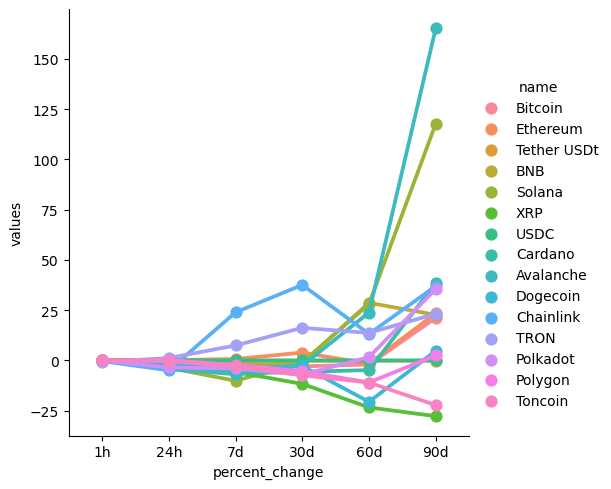

In [31]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [34]:
df10=df[['name','quote.USD.price','timestamp']]
df10=df10.query("name=='Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,42816.13669,2024-02-06 18:08:33.554405


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

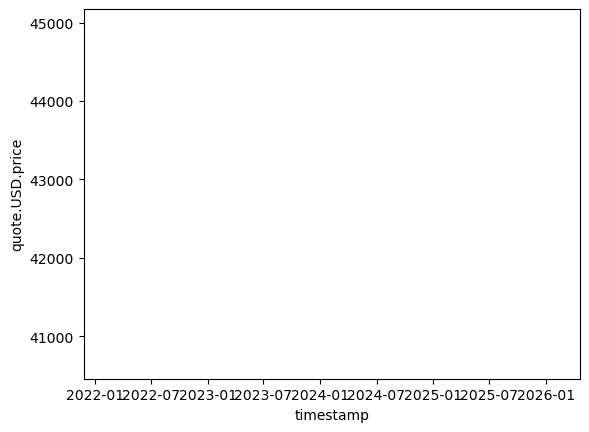

In [35]:
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)